In [1]:
from qiskit import QuantumCircuit, transpile
# from qiskit.providers.aer import QasmSimulator
# from qiskit.providers.basicaer import QasmSimulatorPy
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeManila, FakeToronto
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn.preprocessing as skp
from scipy.signal import savgol_filter
import os
import sys

module_path = os.path.abspath(os.path.join('..')) # qrc_surrogate
sys.path.append(module_path)
fig_path = f'{module_path}/figs'


from src.feedforward import QExtremeLearningMachine, CPolynomialFeedforward
from src.rewinding import QRewindingRC, QRewindingStatevectorRC
from src.data import DataSource

# Quantum Reservoir Computing

There are three main QRC methods implemented:
- QContinuousRC
- QRewindingRC
- QExtremeLearningMachine

and CPolynomialFeedforward as a classical baseline.

What all they all have in common, is that they combine an un-trained non-linear part (quantum circuit) with a trained linear part (classical linear fitter).

nrmse_train:    1.50e-03
nrmse_val:      8.74e-03
corr_train:     9.98e-01
corr_val:       9.41e-01


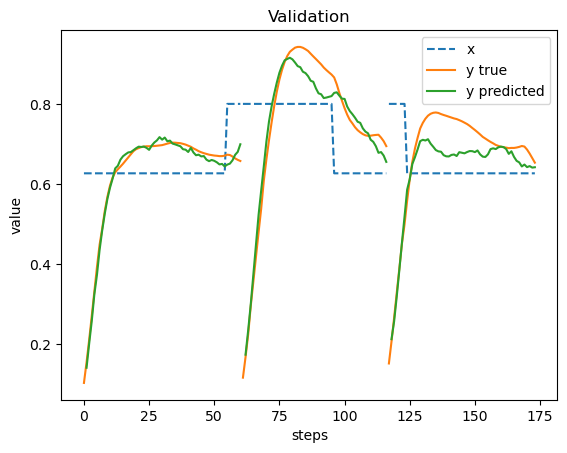

In [2]:
# We always follow the same steps:

# 1. Get some data (defaults to the reactor task)
data = DataSource()

# 2. Get a method
qrc = QExtremeLearningMachine()

# 3. Train and validate the model on the data
qrc.run(data)

# 4. Print and Plot the results
qrc.print_results()
qrc.plot_val(nepisodes=3) # plot the first validation episode

In [ ]:
# Accessing raw values
# [episode][timesteps]
print('y predicted\n', qrc.yval_nonorm[1][20:30])
print('y true\n', qrc.data.yval_nonorm[1][20:30])
# print('y predicted (normed values)\n', qrc.yval[1][20:30])
# print('y true (normed values)\n', qrc.data.yval[1][20:30])

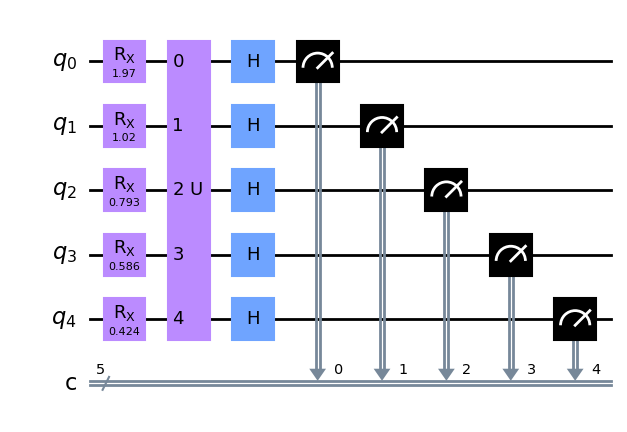

In [3]:
# draw the circuit
# the final layer of H is because the x direction is measured

qrc.qc.draw('mpl')

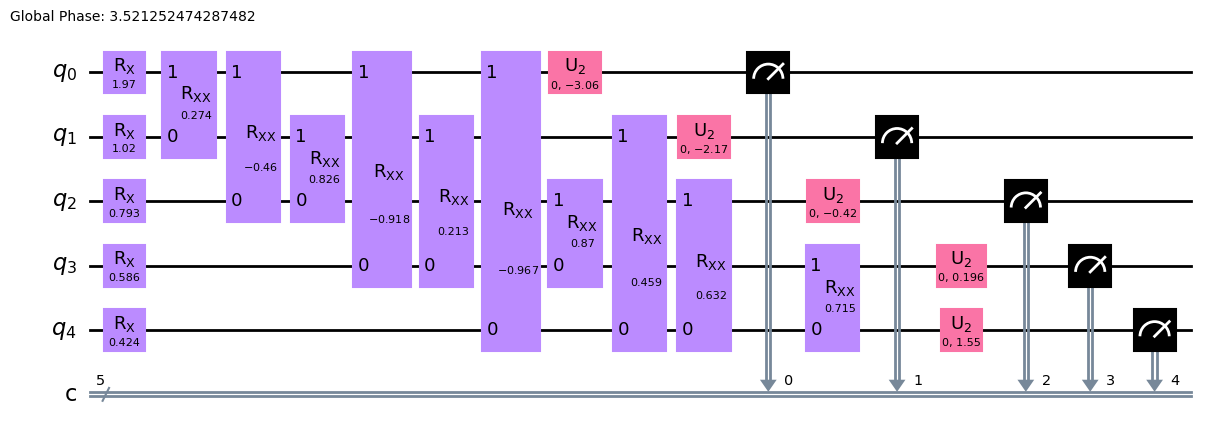

In [4]:
# draw the circuit, but transpiled

qc_transpiled = transpile(qrc.qc, qrc.sim)
qc_transpiled.draw('mpl')

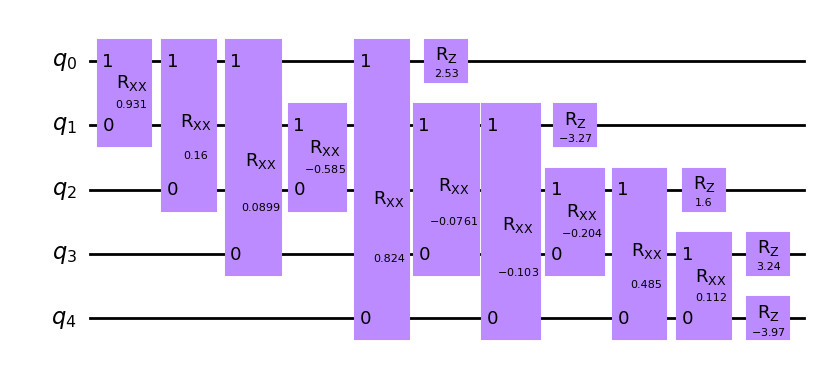

In [5]:
# the 'random unitary' that works best in practice 
# is the fully connected ising model

from circuits import ising_circuit

ising = ising_circuit(nqubits=5, rseed=9369)

ising.draw('mpl')